### Imports

In [1]:
import matplotlib.pyplot as plt
from logos import *
from activation_functions import *
from optimizers import *
from layer import *
from variational_ae import *
from loss import *
from mlp import *
from utils import *


### Config params

In [2]:
INPUT_ROWS = 20
INPUT_COLS = 20
INPUT_SIZE = INPUT_COLS * INPUT_ROWS
LATENT_SIZE = 2
HIDDEN_SIZE = 100
HIDDEN_SIZE2 = 200
HIDDEN_SIZE3 = 300
EMOJIS_CHOSEN = len(logos_images)
NOISE = None


### Training

In [3]:
logos_indexes = np.array([0, 1, 2, 3, 4, 5, 6, 7])
data = np.array(logos_images)
dataset_input = data[logos_indexes]
dataset_input_list = list(dataset_input)

optimizer = Adam(0.001)

encoder = MLP()
encoder.addLayer(Dense(inputDim=INPUT_SIZE, outputDim=HIDDEN_SIZE3, activation=ReLU(), optimizer=optimizer))
encoder.addLayer(Dense(inputDim=HIDDEN_SIZE3, outputDim=HIDDEN_SIZE2, activation=ReLU(), optimizer=optimizer))
encoder.addLayer(Dense(inputDim=HIDDEN_SIZE2, outputDim=HIDDEN_SIZE, activation=ReLU(), optimizer=optimizer))

sampler = Sampler(HIDDEN_SIZE, LATENT_SIZE, optimizer=optimizer)

decoder = MLP()
decoder.addLayer(Dense(inputDim=LATENT_SIZE, outputDim=HIDDEN_SIZE, activation=ReLU(), optimizer=optimizer))
decoder.addLayer(Dense(inputDim=HIDDEN_SIZE, outputDim=HIDDEN_SIZE2, activation=ReLU(), optimizer=optimizer))
decoder.addLayer(Dense(inputDim=HIDDEN_SIZE2, outputDim=HIDDEN_SIZE3, activation=ReLU(), optimizer=optimizer))
decoder.addLayer(Dense(inputDim=HIDDEN_SIZE3, outputDim=INPUT_SIZE, activation=Sigmoid(), optimizer=optimizer))

vae = VAE(encoder, sampler, decoder)

vae.train(dataset_input=dataset_input_list, loss=MSE(), epochs=1000, callbacks={})

### Original vs Decoded

c:\Users\ahmat\Documents\_ITBA\4to\2do Cuatrimestre\SIA\TPs-SIA\Tp5\vae\utils.py:47: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


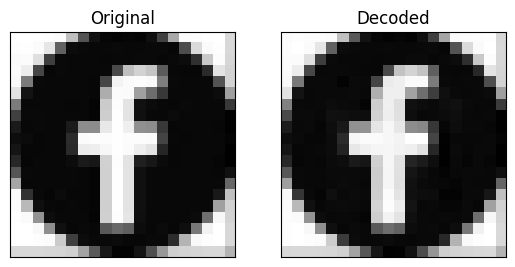

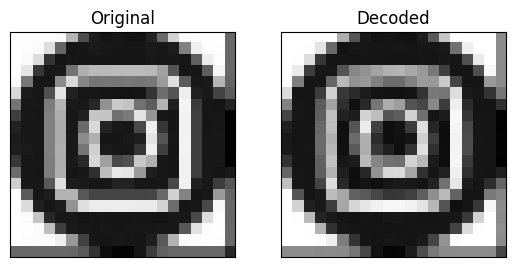

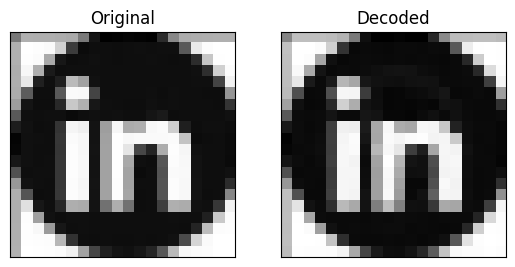

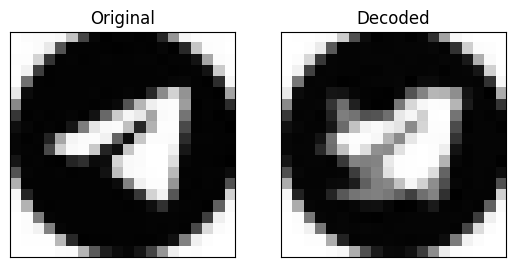

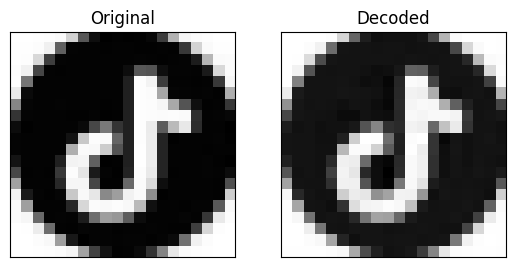

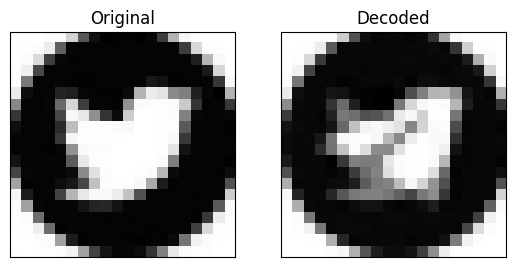

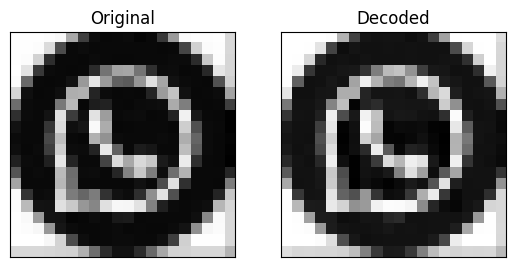

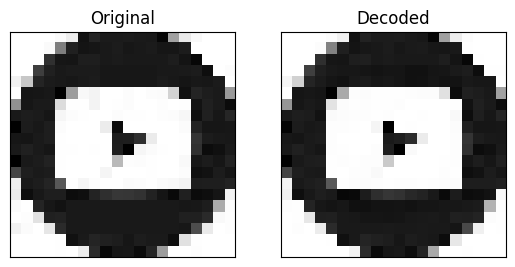

In [4]:
for i in range(len(dataset_input_list)):
    input_reshaped = np.reshape(dataset_input_list[i], (len(dataset_input_list[i]), 1))
    output = vae.feedforward(input_reshaped)
    plot_data(list(dataset_input)[i], output, INPUT_ROWS, INPUT_COLS)

### New Samples Generator

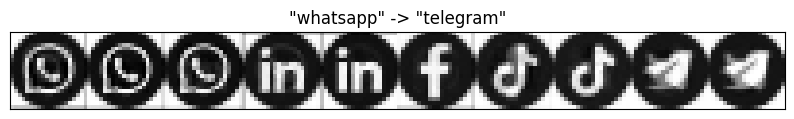

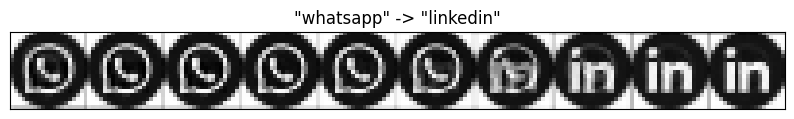

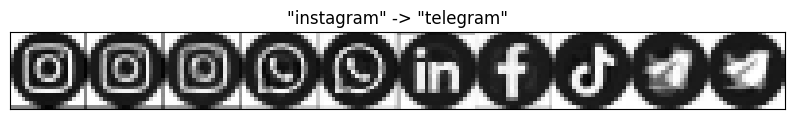

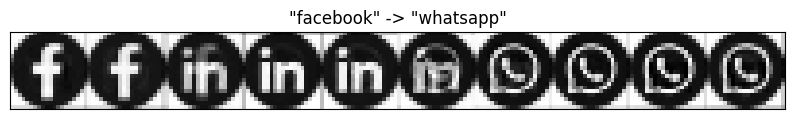

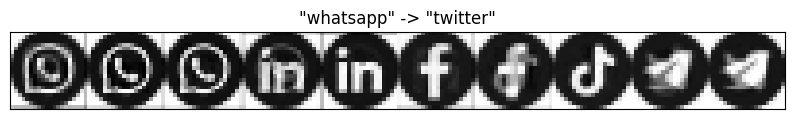

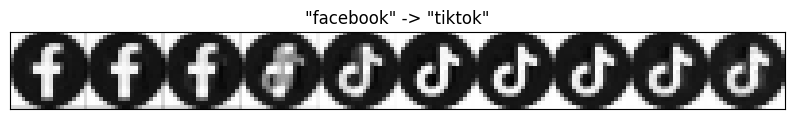

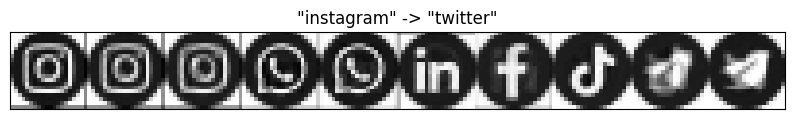

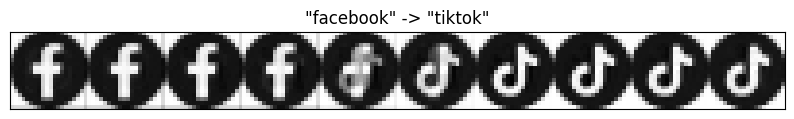

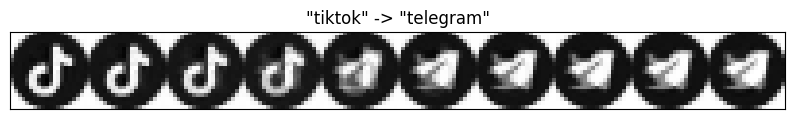

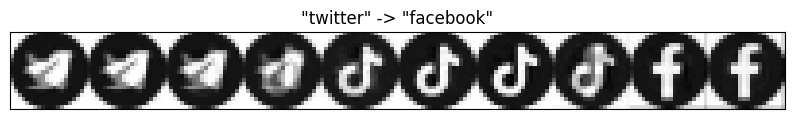

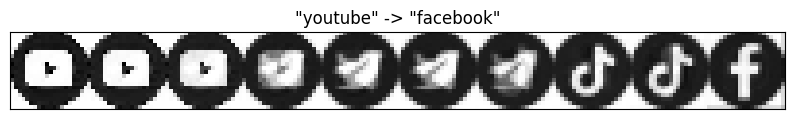

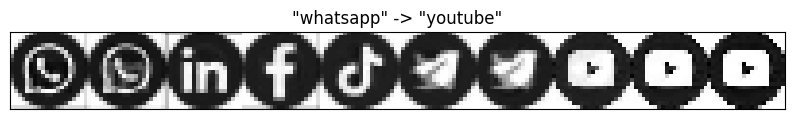

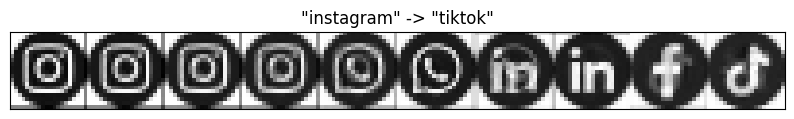

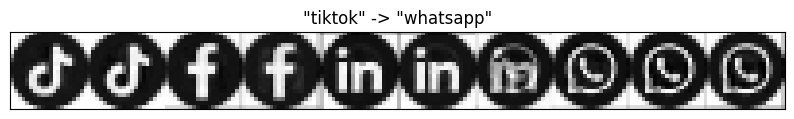

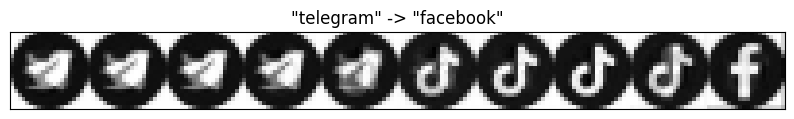

In [5]:
for _ in range(15):
    n = 10
    digit_size = INPUT_ROWS
    images = np.zeros((INPUT_ROWS, INPUT_COLS * n))

    random_index1 = np.random.choice(logos_indexes)
    input_reshaped1 = np.reshape(logos_images[random_index1], (len(logos_images[random_index1]), 1))
    vae.feedforward(input_reshaped1)
    img1 = vae.sampler.sample

    random_index2 = np.random.choice(logos_indexes)
    while random_index1 == random_index2:
        random_index2 = np.random.choice(logos_indexes)
    input_reshaped2 = np.reshape(logos_images[random_index2], (len(logos_images[random_index2]), 1))
    vae.feedforward(input_reshaped2)
    img2 = vae.sampler.sample
    
    for i in range(n):
        z = (img1 * (n - 1 - i) + img2 * i) / (n - 1)
        output = vae.decoder.feedforward(z)
        output = output.reshape(INPUT_ROWS, INPUT_COLS)
        images[:, i * INPUT_COLS:(i + 1) * INPUT_COLS] = output

    plt.figure(figsize=(10, 10))
    plt.title(f"\"{logos_names[random_index1]}\" "
                  f"-> \"{logos_names[random_index2]}\"")
    plt.imshow(images, cmap='gray')
    plt.xticks([])
    plt.yticks([])
    plt.show()


### Moving through the latent space

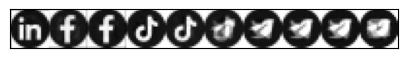

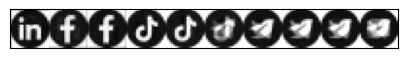

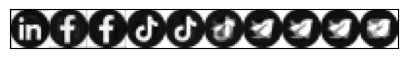

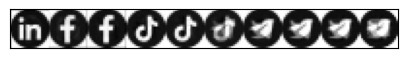

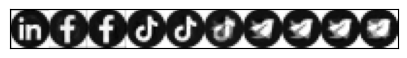

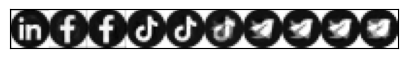

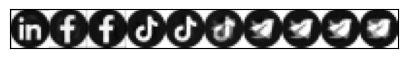

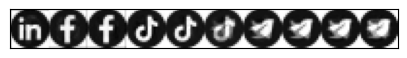

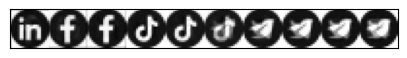

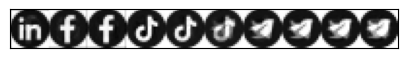

In [6]:
for j in range(10):
    n = 10
    digit_size = INPUT_ROWS
    images = np.zeros((INPUT_ROWS, INPUT_COLS * n))

    random_index1 = np.random.choice(logos_indexes)
    input_reshaped1 = np.reshape(logos_images[random_index1], (len(logos_images[random_index1]), 1))
    vae.feedforward(input_reshaped1)
    img1 = vae.sampler.sample

    random_index2 = np.random.choice(logos_indexes)
    while random_index1 == random_index2:
        random_index2 = np.random.choice(logos_indexes)
    input_reshaped2 = np.reshape(logos_images[random_index2], (len(logos_images[random_index2]), 1))
    vae.feedforward(input_reshaped2)
    img2 = vae.sampler.sample

    
    for i in range(n):
        z = np.array([i*0.2 - 0.5, j *0.2 - 0.5])
        #print(z)
        output = vae.decoder.feedforward(z)
        output = output.reshape(INPUT_ROWS, INPUT_COLS)
        images[:, i * INPUT_COLS:(i + 1) * INPUT_COLS] = output

    plt.figure(figsize=(5, 5))
    plt.imshow(images, cmap='gray')
    plt.xticks([])
    plt.yticks([])
    plt.show()